In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [17]:
mnist = input_data.read_data_sets("/tmp/MNIST_data/", one_hot=True)

Extracting /tmp/MNIST_data/train-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /tmp/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
batch_size = 500
n_input = 784
n_classes = 10

In [19]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
batch_x, batch_y = mnist.train.next_batch(batch_size)

### Show Some Batch Values and Distribution

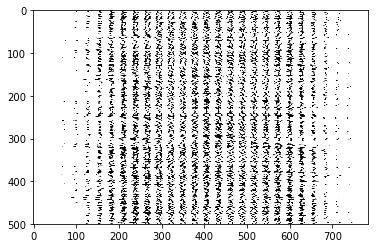

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


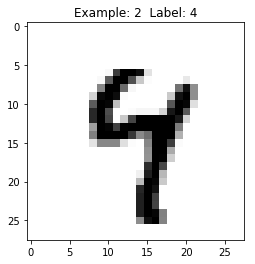

In [20]:
def display_digit(num):
    print(batch_y[num])
    label = batch_y[num].argmax(axis=0)
    image = batch_x[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = batch_x[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, batch_x[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_mult_flat(0, batch_size)
display_digit(2)

In [21]:
# 24x24 filter with 1 layer (20 filters)
W = tf.Variable(tf.random_normal([24, 24, 1, 20]))  
b = tf.Variable(tf.random_normal([4]))

# Reshape data and run conv layer (4 filters)
x = tf.reshape(batch_x, shape=[-1, 28, 28, 1])
m = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# Create session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(m)

array([[[[ -7.83220291e+00,  -4.89800978e+00,  -2.79154849e+00, ...,
            2.58614123e-01,   2.79865122e+00,   6.04245853e+00],
         [ -5.47924137e+00,  -3.71684742e+00,  -3.80596709e+00, ...,
            8.76163840e-01,   1.21120930e+00,   5.82320976e+00],
         [ -6.05754089e+00,  -4.68929338e+00,  -4.91145086e+00, ...,
            1.12724042e+00,   7.08904803e-01,   5.41339254e+00],
         ..., 
         [ -1.69307089e+00,  -1.59771919e+00,  -1.07455599e+00, ...,
            1.23192537e+00,  -8.04295838e-01,   5.86997414e+00],
         [ -4.92948151e+00,  -1.56168222e+00,  -3.07021439e-01, ...,
            2.95289946e+00,  -6.76986575e-01,   3.96903348e+00],
         [ -3.37106514e+00,  -4.57235157e-01,  -1.63836098e+00, ...,
            3.37172723e+00,   1.70729661e+00,   1.66869783e+00]],

        [[ -5.03999758e+00,  -4.79476690e+00,  -5.01727962e+00, ...,
            3.37781644e+00,  -7.05897510e-01,   3.90612674e+00],
         [ -3.16404605e+00,  -5.61707544e+00,